In [5]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [11]:
iris_data = load_iris()

iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [12]:
iris_input = iris_data.data
iris_target = iris_data.target

train_input,  test_input, train_target, test_target = train_test_split(iris_input, iris_target, test_size=0.2, random_state=11)
dt = DecisionTreeClassifier(random_state=156)
dt.fit(train_input, train_target)

DecisionTreeClassifier(random_state=156)

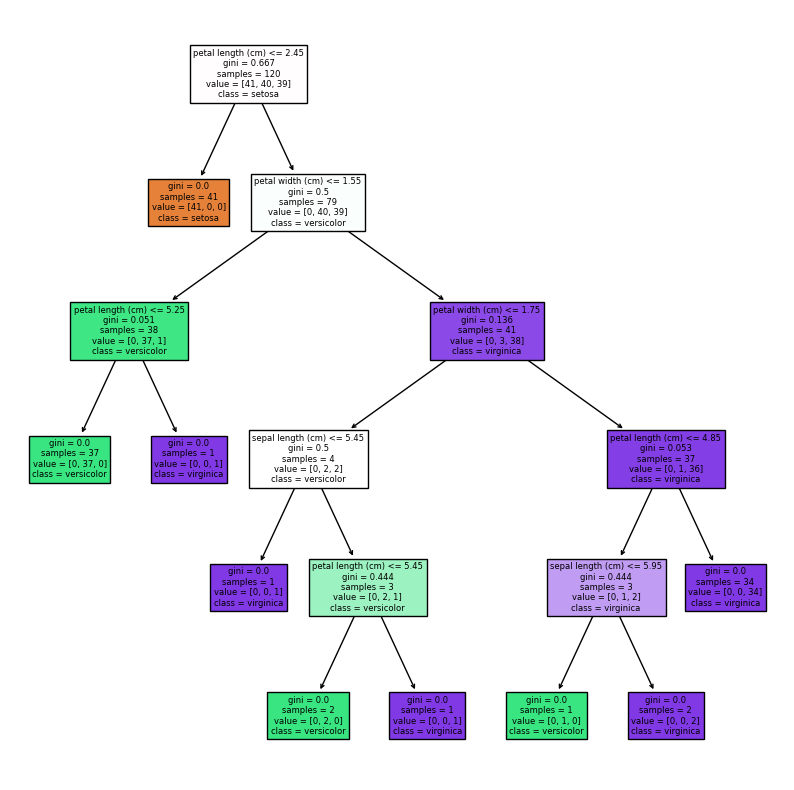

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plot_tree(dt, filled=True, feature_names = iris_data.feature_names, class_names = iris_data.target_names)
plt.show()

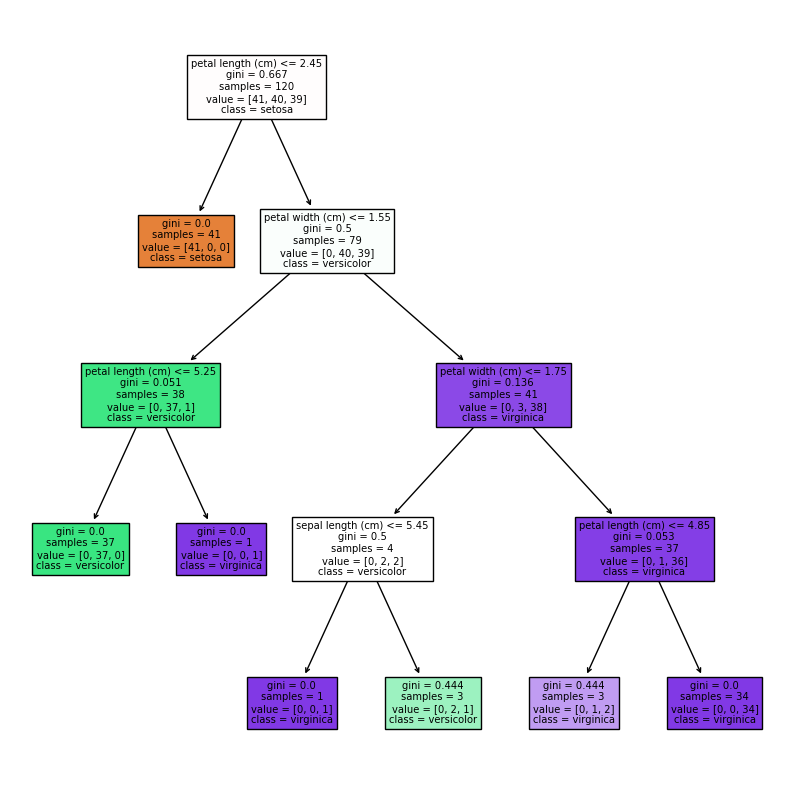

In [25]:
dt = DecisionTreeClassifier(min_samples_split=4, random_state=156)
dt.fit(train_input, train_target)

plt.figure(figsize=(10,10))
plot_tree(dt, filled=True, feature_names = iris_data.feature_names, class_names = iris_data.target_names)
plt.show()

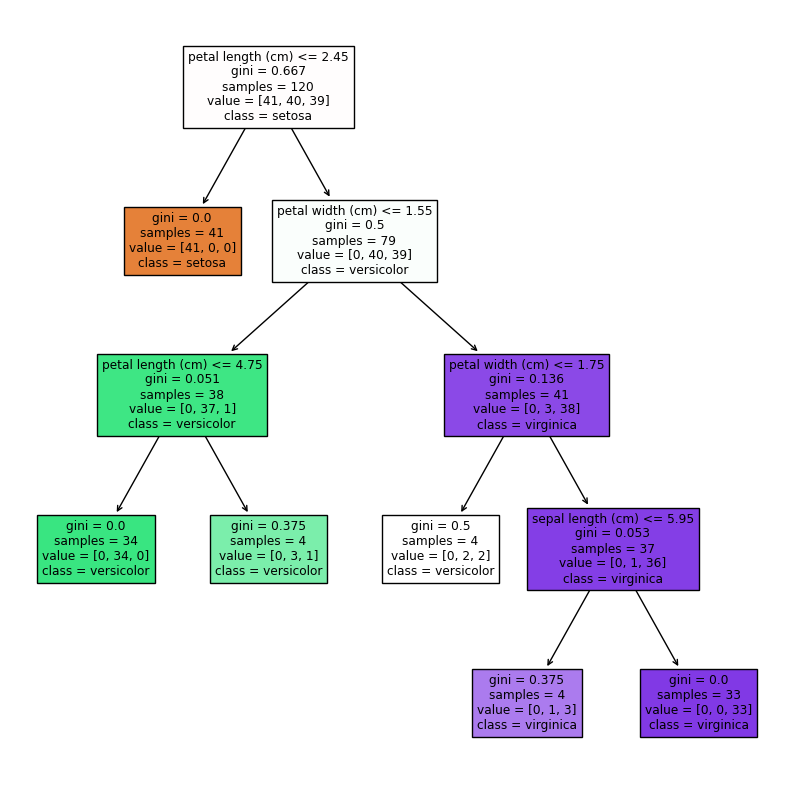

In [40]:
dt = DecisionTreeClassifier(min_samples_leaf=4, random_state=156)
dt.fit(train_input, train_target)

plt.figure(figsize=(10,10))
plot_tree(dt, filled=True, feature_names = iris_data.feature_names, class_names = iris_data.target_names)
plt.show()

min_samples_split = 노드를 분할하기 위한 최소한의 데이터 수

min_samples_leaf = 리프노드가 되기 위한 최소한의 샘플 데이터 수

In [43]:
for name, value in zip(iris_data.feature_names, dt.feature_importances_):
    print('{0} : {1:.4f}'.format(name, value))

sepal length (cm) : 0.0059
sepal width (cm) : 0.0000
petal length (cm) : 0.5459
petal width (cm) : 0.4481


<Axes: >

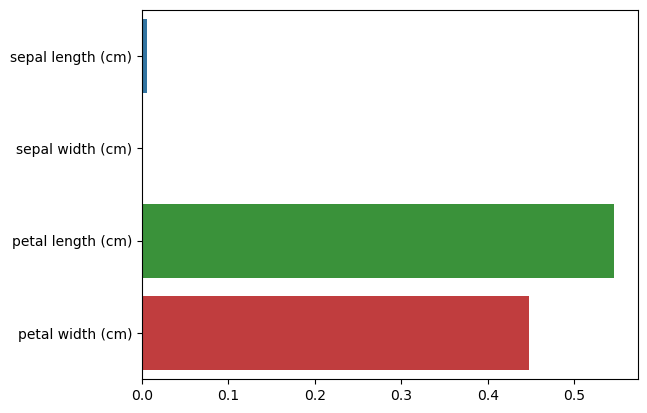

In [45]:
import seaborn as sns

sns.barplot(x=dt.feature_importances_, y=iris_data.feature_names)

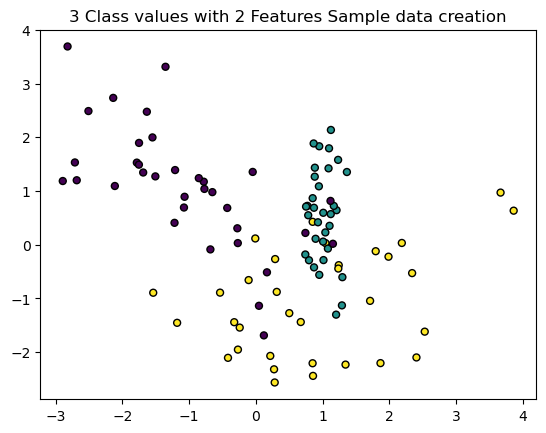

In [54]:
from sklearn.datasets import make_classification
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

X_feature, y_target = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                        n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(X_feature[:,0], X_feature[:,1], marker='o', c=y_target, s=25, edgecolor='k')

In [58]:
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

C:\Users\qkrwo\AppData\Local\Temp\ipykernel_25868\3833059615.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


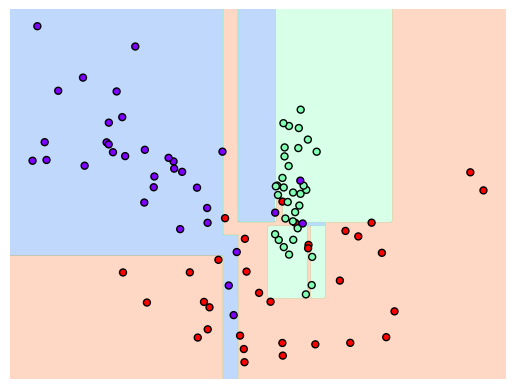

In [59]:
dt = DecisionTreeClassifier(random_state=156).fit(X_feature, y_target)
visualize_boundary(dt, X_feature, y_target)

C:\Users\qkrwo\AppData\Local\Temp\ipykernel_25868\3833059615.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


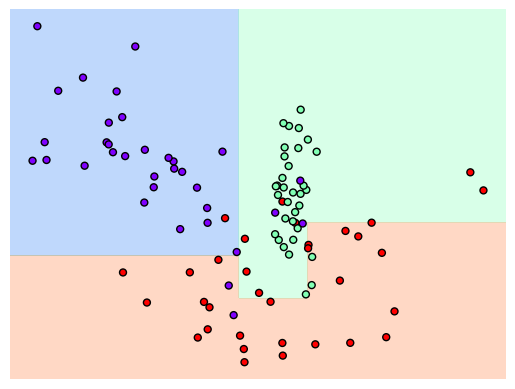

In [62]:
dt = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_feature, y_target)
visualize_boundary(dt, X_feature, y_target)